In [12]:
import tensorflow 
from tensorflow.keras.datasets import boston_housing

(x_train,y_train),(x_test,y_test) = boston_housing.load_data()
print('Shape of the training features',x_train.shape)
print('Shape of the testing features',x_test.shape)

Shape of the training features (404, 13)
Shape of the testing features (102, 13)


In [13]:
mean = x_train.mean(axis=0)

x_train -= mean
x_test -= mean

std = x_train.std(axis= 0)

x_train /= std
x_test /= std

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential()
    # On spécifie les tailles de l'entrée sans se préoccuper du nombre d'instances
    model.add(Dense(64,activation='relu',input_shape = (x_train.shape[1],)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss = 'mse',metrics = ['mae'])
    return model

In [33]:
# Implementing k-fold cross validation 
import numpy as np

k = 4
num_val_samples = len(x_train)//k
error = []
num_epochs = 500
for i in range(k):
    
    training = np.concatenate([x_train[:i*num_val_samples],x_train[(i+1)*num_val_samples:]],axis = 0)
    y_training = np.concatenate([y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],axis = 0)
    
    validating = x_train[i*num_val_samples:(i+1)*num_val_samples]
    y_validating = y_train[i*num_val_samples:(i+1)*num_val_samples]
    
    model = build_model()
    
    history = model.fit(training,y_training,verbose = 0,epochs = num_epochs,batch_size = 1,validation_data=(validating,y_validating))
    
    mae_history = history.history['val_mae']
    
    error.append(mae_history)

In [34]:
mae_avg = [
    np.mean([x[i] for x in error]) for i in range(num_epochs)
]
print(len(mae_avg))

500


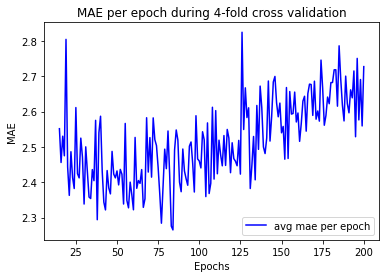

In [41]:
import matplotlib.pyplot as plt

epochs = range(15,200+1)

plt.plot(epochs,mae_avg[14:200],'b',label='avg mae per epoch')
plt.title('MAE per epoch during 4-fold cross validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()